# Class #1

We first import the necessary python modules: we use the data analysis library pandas and statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

We read the data set as a data frame and print its head

In [4]:
redmeat = pd.read_csv('red_meat.csv')
redmeat_population = pd.read_csv('red_meat_population.csv')

redmeat.head()

,id,red_meat,cardiac_risk,male_dummy,female_dummy,smoking
0,1,4.615426,6.287400,0,1,1.384628
1,2,3.179725,4.813164,1,0,0.953918
2,3,3.433238,4.592836,1,0,1.029972
3,4,4.110157,2.084957,0,1,0.000000
4,5,3.418863,5.317896,1,0,0.000000


We run a simple regression

In [8]:
model = smf.ols(formula='cardiac_risk ~ red_meat', data=redmeat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     264.5
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           6.12e-53
Time:                        00:06:13   Log-Likelihood:                -1658.2
No. Observations:                1000   AIC:                             3320.
Df Residuals:                     998   BIC:                             3330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3791      0.080     41.994      0.0

Intercept    3.379053
red_meat     0.318688
dtype: float64
                  0         1
Intercept  3.221153  3.536953
red_meat   0.280237  0.357139
Intercept    8.584743e-223
red_meat      6.116518e-53
dtype: float64
0.20952391694295402


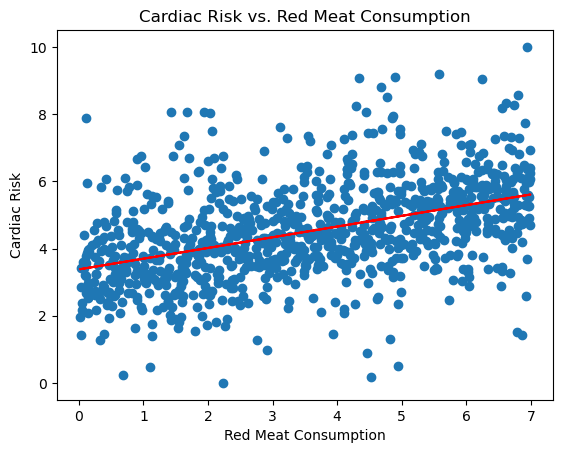

In [12]:
#coefficients
print(model.params)

#confidence intervals
print(model.conf_int())

We construct a scatter plot and add the regression line

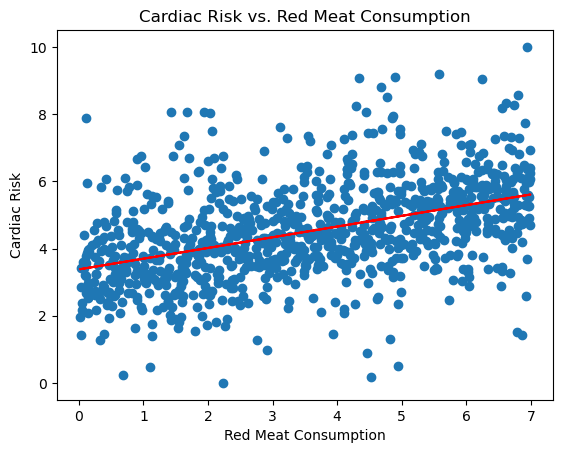

In [13]:
#plot
plt.scatter(redmeat['red_meat'], redmeat['cardiac_risk'])
plt.plot(redmeat['red_meat'], model.predict(), color='red')
plt.xlabel('Red Meat Consumption')
plt.ylabel('Cardiac Risk')
plt.title('Cardiac Risk vs. Red Meat Consumption')
plt.show()

**Q:** Run a regression of cardiac risk on smoking (packs per day). Interpret the intercept and the coefficient estimate on smoking


In [15]:
model = smf.ols(formula='cardiac_risk ~ smoking', data=redmeat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     332.6
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.34e-64
Time:                        00:19:32   Log-Likelihood:                -1631.9
No. Observations:                1000   AIC:                             3268.
Df Residuals:                     998   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5650      0.065     54.787      0.0

We run a regression with meat and meat^2

In [16]:
model = smf.ols(formula='cardiac_risk ~ red_meat + red_meat^2', data=redmeat).fit()
print(model.summary())

PatsyError: Error evaluating factor: TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]
    cardiac_risk ~ red_meat + red_meat^2
                              ^^^^^^^^^^

**Binary X: Dummy varible**

Run a regression of cardiac risk on the female_dummy (variable=1 if respondent is female, 0 otherwise) OR on the male_dummy (not both, because of multicollinearity)



In [17]:
model = smf.ols(formula='cardiac_risk ~ female_dummy', data=redmeat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cardiac_risk   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.055
Date:                Sun, 03 Mar 2024   Prob (F-statistic):            0.00269
Time:                        00:21:44   Log-Likelihood:                -1771.2
No. Observations:                1000   AIC:                             3546.
Df Residuals:                     998   BIC:                             3556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4048      0.058     76.538   